Mounted at /content/drive
Ensemble Model Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.92


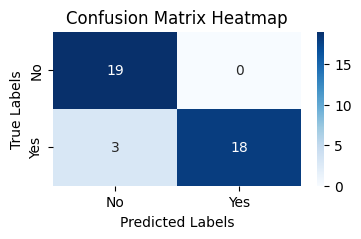

In [ ]:
# Google Drive মাউন্ট
from google.colab import drive
drive.mount('/content/drive')

# প্রয়োজনীয় লাইব্রেরি ইনস্টল ও ইমপোর্ট
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ডেটাসেট লোড করুন
data = pd.read_excel('/content/drive/My Drive/tajul.xlsx')  # আপনার ফাইলের সঠিক পাথ দিন

# ডেটা প্রি-প্রসেসিং
X = data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Qchat-10-Score']]  # ফিচারস
y = data['Class/ASD Traits']  # টার্গেট ভ্যারিয়েবল

# ডেটা ট্রেন এবং টেস্ট সেটে ভাগ করুন
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# সংখ্যা স্কেলিং
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# মডেল তৈরি করুন
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()
svm_model = SVC(probability=True)  # SVM এর জন্য probability=True
knn_model = KNeighborsClassifier()

# Voting Classifier তৈরি করুন
voting_classifier = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('random_forest', random_forest),
    ('gradient_boost', gradient_boost),
    ('svm', svm_model),
    ('knn', knn_model)
], voting='soft')

# Voting Classifier প্রশিক্ষণ
voting_classifier.fit(X_train, y_train)

# প্রেডিকশন করুন
y_pred = voting_classifier.predict(X_test)

# পারফরম্যান্স মূল্যায়ন
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# ফলাফল প্রিন্ট করুন
print(f'Ensemble Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix heatmap visualize করুন
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=voting_classifier.classes_, yticklabels=voting_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
import requests
import os

def download_image(url, save_path):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
            return True
    except Exception as e:
        print(f"Error downloading image from {url}: {e}")
    return False

# PictureLink থেকে ইমেজ পাথ তৈরি করুন এবং ডাউনলোড করুন
downloaded_image_paths = []
for url in data['PictureLink']:
    file_name = url.split('=')[-1] + '.jpg'  # বা .png, .jpeg অন্য যে ফরম্যাট
    file_path = f'/content/drive/My Drive/{file_name}'
    if download_image(url, file_path):
        downloaded_image_paths.append(file_path)

# নিশ্চিতকরণ
if not downloaded_image_paths:
    print("No images were downloaded. Please check the links.")
else:
    print(f"Total downloaded images: {len(downloaded_image_paths)}")

# ফিচার এক্সট্রাকশন
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np

def extract_features(image_paths):
    model = VGG19(weights='imagenet', include_top=False)
    features = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = model.predict(x)
        features.append(feature.flatten())
    return np.array(features)

# ইমেজ ফিচার তৈরি
if downloaded_image_paths:
    image_features = extract_features(downloaded_image_paths)
    print(f"Extracted image features shape: {image_features.shape}")
else:
    print("No images available for feature extraction.")

# বাকি কোড (Voting Classifier এবং পারফরম্যান্স মূল্যায়ন) একই রয়ে যাবে


Total downloaded images: 200
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━

Ensemble Model Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


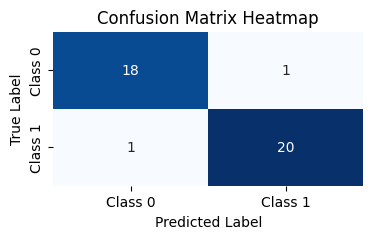

In [ ]:
# প্রয়োজনীয় লাইব্রেরি ইমপোর্ট
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# টার্গেট ভ্যারিয়েবল
y = data['Class/ASD Traits']  # টার্গেট ভ্যারিয়েবল

# ডেটা ট্রেন এবং টেস্ট সেটে ভাগ করুন
X_train, X_test, y_train, y_test = train_test_split(image_features, y, test_size=0.2, random_state=42)

# মডেল তৈরি করুন
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()
svm_model = SVC(probability=True)  # SVM এর জন্য probability=True
knn_model = KNeighborsClassifier()

# Voting Classifier তৈরি করুন
voting_classifier = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('random_forest', random_forest),
    ('gradient_boost', gradient_boost),
    ('svm', svm_model),
    ('knn', knn_model)
], voting='soft')

# মডেল ট্রেনিং এবং প্রেডিকশন
voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)

# পারফরম্যান্স মূল্যায়ন
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Ensemble Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# কনফিউশন ম্যাট্রিক্স হিটম্যাপ
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
